In [11]:
import pandas as pd 

# Assuming your CSV file is in the same directory as your notebook
# Replace 'filename.csv' with your actual CSV file name
df = pd.read_csv('sample_payroll.csv')

# To display the first few rows of the dataframe
df.head()

,employee_id,pay_rate,year
0,40,16.0,2024
1,214,29.0,2024
2,238,16.5,2021
3,697,16.0,2021
4,896,16.0,2021


In [12]:
df2 = pd.read_csv('sample_timekeeping.csv')
df2 

,employee_id,department,Location,Supervisor,date,punchin1,punchout1,punchin2,punchout2,punchin3,punchout3
0,40,ADMINISTRATION,SD,Joseph,2/23/24,2/23/24 7:33,2/23/24 11:46,2/23/24 12:20,2/23/24 16:15,NaN,NaN
1,40,ADMINISTRATION,SD,Joseph,7/12/24,7/12/24 7:30,7/12/24 11:51,7/12/24 12:27,7/12/24 16:05,NaN,NaN
2,40,ADMINISTRATION,SD,Joseph,4/9/24,4/9/24 7:34,4/9/24 11:48,4/9/24 12:19,4/9/24 15:59,NaN,NaN
3,40,ADMINISTRATION,SD,Joseph,8/29/24,8/29/24 7:36,8/29/24 11:53,8/29/24 12:23,8/29/24 16:04,NaN,NaN
4,40,ADMINISTRATION,SD,Joseph,2/7/24,2/7/24 7:30,2/7/24 11:50,2/7/24 12:24,2/7/24 15:58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4995,9965,WAREHOUSE,LA,Richard,10/12/21,10/12/21 7:25,10/12/21 11:53,10/12/21 12:22,10/12/21 16:02,NaN,NaN
4996,9965,WAREHOUSE,LA,Richard,8/26/22,8/26/22 8:00,8/26/22 12:05,8/26/22 12:32,8/26/22 16:32,NaN,NaN
4997,9965,WAREHOUSE,LA,Richard,11/11/21,11/11/21 7:25,11/11/21 11:48,11/11/21 12:19,11/11/21 16:02,NaN,NaN
4998,9965,WAREHOUSE,LA,Richard,10/24/22,10/24/22 7:56,10/24/22 12:08,10/24/22 12:40,10/24/22 16:27,NaN,NaN


1) Discover if certain departments consistently take longer breaks than others, which might indicate different workload pressures or departmental cultures

2) Identify if break durations correlate with location, potentially revealing facility-specific issues (e.g., inadequate break rooms or long distances to break areas)

3) Determine if specific supervisors' teams have significantly different break patterns, suggesting management style impacts

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. Load the datasets
payroll_df = pd.read_csv('sample_payroll.csv')
timekeeping_df = pd.read_csv('sample_timekeeping.csv')

# 2. Convert datetime columns to proper datetime objects
datetime_columns = ['punchin1', 'punchout1', 'punchin2', 'punchout2', 'punchin3', 'punchout3']
for col in datetime_columns:
    timekeeping_df[col] = pd.to_datetime(timekeeping_df[col], errors='coerce')

# Convert date column to datetime
timekeeping_df['date'] = pd.to_datetime(timekeeping_df['date'], errors='coerce')

# 3. Calculate break durations
# Break 1: Time between punchout1 and punchin2
timekeeping_df['break1_duration'] = (timekeeping_df['punchin2'] - timekeeping_df['punchout1']).dt.total_seconds() / 60  # in minutes

# Break 2: Time between punchout2 and punchin3
timekeeping_df['break2_duration'] = (timekeeping_df['punchin3'] - timekeeping_df['punchout2']).dt.total_seconds() / 60  # in minutes

# 4. Filter out invalid break durations (negative or extremely large values)
# These could be from shifts spanning multiple days or data errors
timekeeping_df = timekeeping_df.copy()
max_reasonable_break = 240  # 4 hours in minutes - adjust based on your company policies
min_reasonable_break = 0

# Filter out unreasonable breaks
timekeeping_df['break1_duration'] = timekeeping_df['break1_duration'].apply(
    lambda x: np.nan if pd.isna(x) or x < min_reasonable_break or x > max_reasonable_break else x)
timekeeping_df['break2_duration'] = timekeeping_df['break2_duration'].apply(
    lambda x: np.nan if pd.isna(x) or x < min_reasonable_break or x > max_reasonable_break else x)

# 5. Calculate basic statistics on breaks
print("Basic Break Duration Statistics:")
print("\nBreak 1 Statistics (minutes):")
print(timekeeping_df['break1_duration'].describe())
print("\nBreak 2 Statistics (minutes):")
print(timekeeping_df['break2_duration'].describe())

/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_69345/1703607750.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timekeeping_df[col] = pd.to_datetime(timekeeping_df[col], errors='coerce')
/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_69345/1703607750.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timekeeping_df[col] = pd.to_datetime(timekeeping_df[col], errors='coerce')
/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_69345/1703607750.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timekeeping_df[col] = pd.to_datetime(timeke

Basic Break Duration Statistics:

Break 1 Statistics (minutes):
count    4897.000000
mean       31.087809
std         5.674199
min        15.000000
25%        30.000000
50%        31.000000
75%        32.000000
max       210.000000
Name: break1_duration, dtype: float64

Break 2 Statistics (minutes):
count    14.000000
mean     31.642857
std       5.527653
min      27.000000
25%      29.250000
50%      30.000000
75%      31.750000
max      50.000000
Name: break2_duration, dtype: float64


/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_69345/1703607750.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timekeeping_df[col] = pd.to_datetime(timekeeping_df[col], errors='coerce')
/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_69345/1703607750.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timekeeping_df[col] = pd.to_datetime(timekeeping_df[col], errors='coerce')
/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_69345/1703607750.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timekeeping_df['date'] = pd.to_datetime(tim

In [14]:
# 6. Merge with payroll data to enable pay-rate related analysis
merged_df = pd.merge(timekeeping_df, payroll_df, on='employee_id', how='left')

# 7. Analysis by Department
dept_break_analysis = timekeeping_df.groupby('department')[['break1_duration', 'break2_duration']].agg(
    ['mean', 'median', 'std', 'count']).reset_index()
print("\nDepartment-wise Break Analysis:")
print(dept_break_analysis)

# 8. Analysis by Location
loc_break_analysis = timekeeping_df.groupby('Location')[['break1_duration', 'break2_duration']].agg(
    ['mean', 'median', 'std', 'count']).reset_index()
print("\nLocation-wise Break Analysis:")
print(loc_break_analysis)

# 9. Analysis by Supervisor
sup_break_analysis = timekeeping_df.groupby('Supervisor')[['break1_duration', 'break2_duration']].agg(
    ['mean', 'median', 'std', 'count']).reset_index()
print("\nSupervisor-wise Break Analysis:")
print(sup_break_analysis)



Department-wise Break Analysis:
                    department break1_duration                         \
                                          mean median       std count   
0               ADMINISTRATION       32.594595   33.0  2.420508    37   
1             CUSTOMER SERVICE       32.191781   31.0  8.102804   365   
2                IT DEPARTMENT       27.000000   27.0  1.000000     3   
3   LOGISTICS AND DISTRIBUTION       31.293103   31.0  4.699850   522   
4                  MAINTENANCE       30.031447   30.0  0.208107   159   
5                    MARKETING       30.730769   31.0  2.386581   312   
6                        OTHER       30.000000   30.0  0.000000   184   
7                  PROCUREMENT       31.622951   31.0  1.576312   122   
8              QUALITY CONTROL       32.171171   31.0  6.116329   222   
9     RESEARCH AND DEVELOPMENT       30.324209   30.0  2.407914  1169   
10                       SALES       30.554318   31.0  2.553031   718   
11                

/var/folders/0b/kbxw3yp15078rb4blsyr1khw0000gn/T/ipykernel_69345/2630603710.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pay_rate_breaks = merged_df.groupby('pay_rate_bin')[['break1_duration']].mean().reset_index()


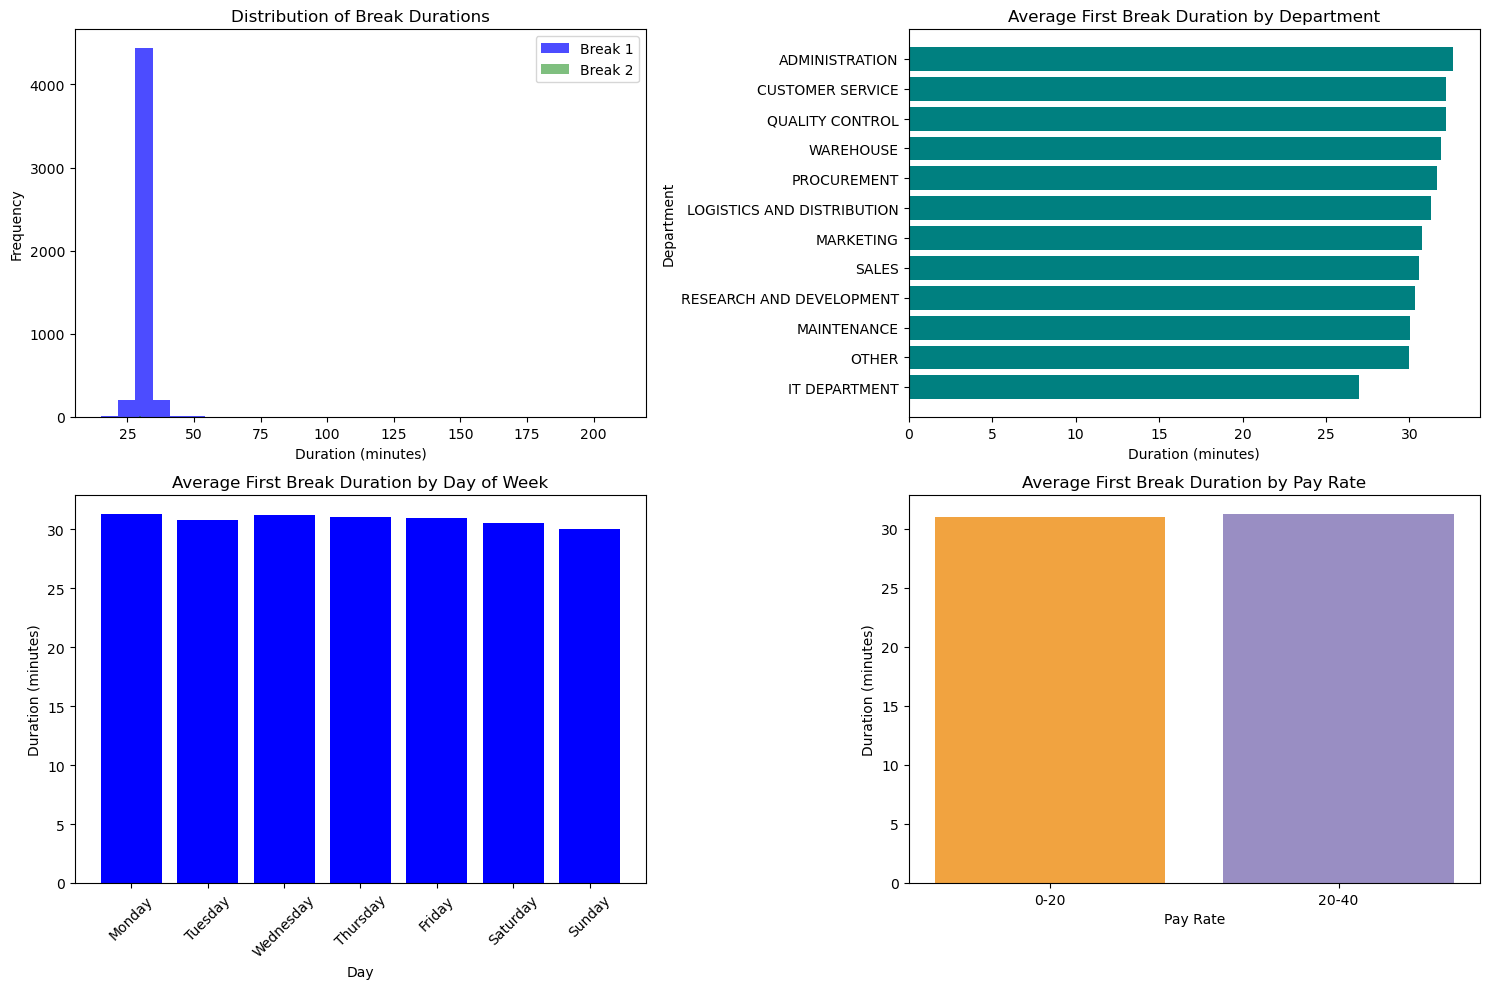

In [19]:
# 10. Visualizations

# Create figure with subplots
plt.figure(figsize=(15, 10))

# 10.1 Break duration distributions using matplotlib instead of seaborn
plt.subplot(2, 2, 1)
plt.hist(timekeeping_df['break1_duration'].dropna(), bins=30, color='blue', alpha=0.7, label='Break 1')
plt.hist(timekeeping_df['break2_duration'].dropna(), bins=30, color='green', alpha=0.5, label='Break 2')
plt.title('Distribution of Break Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()

# 10.2 Department-wise break durations using matplotlib
plt.subplot(2, 2, 2)
dept_breaks = timekeeping_df.groupby('department')[['break1_duration']].mean().sort_values('break1_duration').reset_index()
plt.barh(dept_breaks['department'], dept_breaks['break1_duration'], color='teal')
plt.title('Average First Break Duration by Department')
plt.xlabel('Duration (minutes)')
plt.ylabel('Department')

# 10.3 Break duration by day of week
timekeeping_df['day_of_week'] = timekeeping_df['date'].dt.day_name()
# Define day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.subplot(2, 2, 3)
day_breaks = timekeeping_df.groupby('day_of_week')[['break1_duration']].mean().reset_index()
# Convert to categorical with ordered days
day_dict = {day: i for i, day in enumerate(day_order)}
day_breaks['day_num'] = day_breaks['day_of_week'].map(day_dict)
day_breaks = day_breaks.sort_values('day_num')
plt.bar(day_breaks['day_of_week'], day_breaks['break1_duration'], color='blue')
plt.title('Average First Break Duration by Day of Week')
plt.xlabel('Day')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)

# 10.4 Break duration by pay rate using matplotlib
plt.subplot(2, 2, 4)
# Create pay rate bins
merged_df['pay_rate_bin'] = pd.cut(merged_df['pay_rate'], bins=[0, 20, 40, 60, 100, 300], 
                                labels=['0-20', '20-40', '40-60', '60-100', '100+'])
pay_rate_breaks = merged_df.groupby('pay_rate_bin')[['break1_duration']].mean().reset_index()
colors = ['#f1a340', '#998ec3', '#542788', '#2d004b', '#003c30']  # custom color palette
plt.bar(pay_rate_breaks['pay_rate_bin'], pay_rate_breaks['break1_duration'], color=colors[:len(pay_rate_breaks)])
plt.title('Average First Break Duration by Pay Rate')
plt.xlabel('Pay Rate')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.savefig('break_duration_analysis.png')
plt.show()

In [20]:
# 11. Advanced Analysis - Break Compliance
# Assuming standard breaks should be at least 15 minutes but not more than 60
short_break_threshold = 15  # minutes
long_break_threshold = 60   # minutes

# Calculate compliance metrics
timekeeping_df['break1_too_short'] = timekeeping_df['break1_duration'] < short_break_threshold
timekeeping_df['break1_too_long'] = timekeeping_df['break1_duration'] > long_break_threshold
timekeeping_df['break2_too_short'] = timekeeping_df['break2_duration'] < short_break_threshold
timekeeping_df['break2_too_long'] = timekeeping_df['break2_duration'] > long_break_threshold

# Calculate compliance percentages
compliance_results = pd.DataFrame({
    'total_records': len(timekeeping_df),
    'break1_too_short_count': timekeeping_df['break1_too_short'].sum(),
    'break1_too_short_pct': timekeeping_df['break1_too_short'].mean() * 100,
    'break1_too_long_count': timekeeping_df['break1_too_long'].sum(),
    'break1_too_long_pct': timekeeping_df['break1_too_long'].mean() * 100,
    'break2_too_short_count': timekeeping_df['break2_too_short'].sum(),
    'break2_too_short_pct': timekeeping_df['break2_too_short'].mean() * 100,
    'break2_too_long_count': timekeeping_df['break2_too_long'].sum(),
    'break2_too_long_pct': timekeeping_df['break2_too_long'].mean() * 100,
}, index=[0])

print("\nBreak Compliance Analysis:")
print(compliance_results)

# 12. Department-wise compliance
dept_compliance = timekeeping_df.groupby('department').agg(
    break1_too_short_pct=('break1_too_short', lambda x: x.mean() * 100),
    break1_too_long_pct=('break1_too_long', lambda x: x.mean() * 100),
    break2_too_short_pct=('break2_too_short', lambda x: x.mean() * 100),
    break2_too_long_pct=('break2_too_long', lambda x: x.mean() * 100)
).reset_index()

print("\nDepartment-wise Break Compliance:")
print(dept_compliance)

# 13. Export processed data for further analysis
timekeeping_df.to_csv('processed_timekeeping_with_breaks.csv', index=False)
merged_df.to_csv('merged_timekeeping_payroll.csv', index=False)

print("\nAnalysis complete. Data saved to 'processed_timekeeping_with_breaks.csv' and 'merged_timekeeping_payroll.csv'")


Break Compliance Analysis:
   total_records  break1_too_short_count  break1_too_short_pct  \
0           5000                       0                   0.0   

   break1_too_long_count  break1_too_long_pct  break2_too_short_count  \
0                     14                 0.28                       0   

   break2_too_short_pct  break2_too_long_count  break2_too_long_pct  
0                   0.0                      0                  0.0  

Department-wise Break Compliance:
                    department  break1_too_short_pct  break1_too_long_pct  \
0               ADMINISTRATION                   0.0             0.000000   
1             CUSTOMER SERVICE                   0.0             1.591512   
2                IT DEPARTMENT                   0.0             0.000000   
3   LOGISTICS AND DISTRIBUTION                   0.0             0.187617   
4                  MAINTENANCE                   0.0             0.000000   
5                    MARKETING                   0.0   